In [43]:
#Importar bibliotecas necessárias
import pandas as pd
import numpy as np 
import os
cwd = os.getcwd()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [26]:
# Carregar dados
data = pd.read_csv(f'{cwd}/creditcard.csv')
print(data)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [27]:
# Separar dados em recursos e rótulos
number_of_fraud = len(data[data.Class == 1])
number_of_normal= len(data[data.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)


Fraude: 492
Normal: 284315


/Users/batistajunior/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

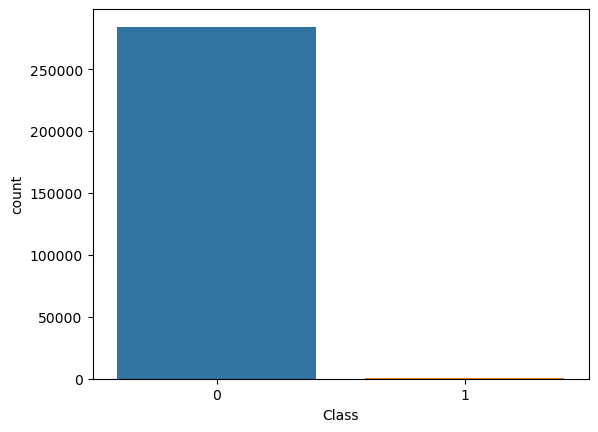

In [28]:
sns.countplot("Class", data=data)

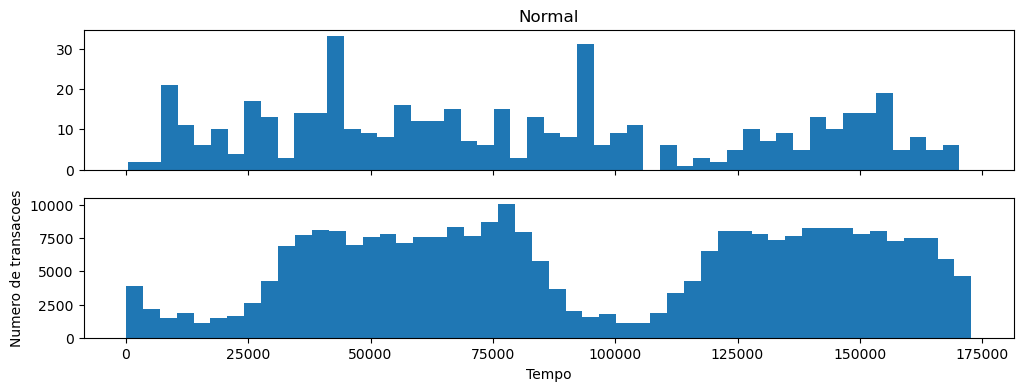

In [30]:
f, (ax1, ax2) = plt.subplots(2,1, sharex= True, figsize=(12,4))
bins=50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(data.Time[data.Class == 0 ], bins = bins)
ax1.set_title('Normal')

plt.xlabel('Tempo')
plt.ylabel('Numero de transacoes')
plt.show()

In [32]:
print ("Fraude")
print(data.Amount[data.Class ==1].describe())
print()
print ("Normal")
print(data.Amount[data.Class ==0].describe())


Fraude
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


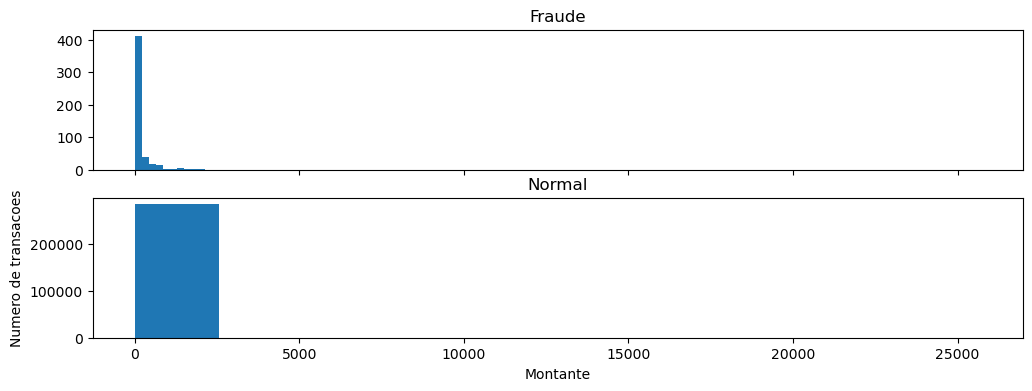

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 10

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Montante')
plt.ylabel('Numero de transacoes')
plt.show()

In [34]:
PCA_features = data.iloc[:,1:29].columns

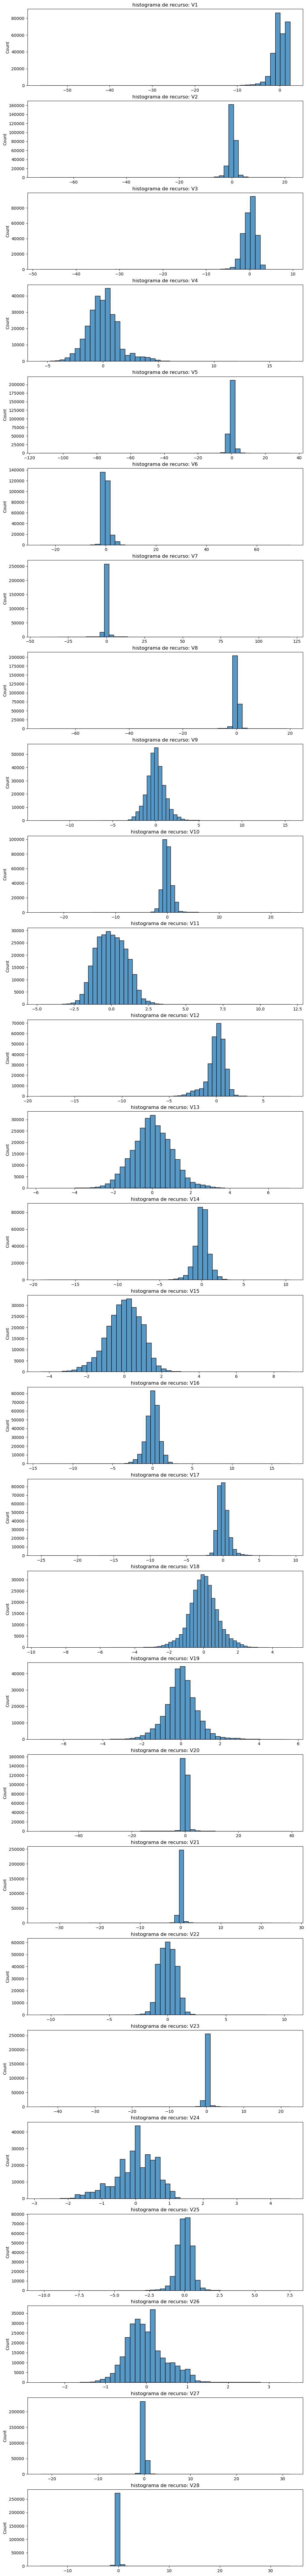

In [38]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[PCA_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[cn][data.Class == 1], bins=50)
    sns.histplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma de recurso: ' + str(cn))
plt.show()


In [39]:
data = data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0


In [40]:
data['Normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,-0.073403


In [41]:
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403


In [44]:
#índices of normal class
indices_of_normal = data[data.Class==0].index
#escolha aleatoriamente a mesma quantidade de amostras que a fraude e retorne seus índices
random_indices_of_normal = np.array(np.random.choice(indices_of_normal, number_of_fraud, replace=False))
#indices of fraud class
indices_of_fraud = np.array(data[data.Class == 1].index)
#indices of undersampled dataset
indices_of_undersampled = np.concatenate([random_indices_of_normal, indices_of_fraud])
#conjunto de dados com pouca amostra
data_of_undersampled = data.iloc[indices_of_undersampled,:]

print(len(data_of_undersampled))

984


In [45]:
#conjunto de dados inteiro
X = data.loc[:,data.columns!='Class']
y = data.loc[:,data.columns=='Class']

#treinar e testar o conjunto de dados dividido em todo o conjunto de dados, com proporção 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Numero de transacoes treinar conjunto de dados: ", len(X_train))
print("Conjunto de dados de teste de transacoes numericas: ", len(X_test))
print("Numero total de transacoes: ", len(X_train)+len(X_test))

Numero de transacoes treinar conjunto de dados:  199364
Conjunto de dados de teste de transacoes numericas:  85443
Numero total de transacoes:  284807


In [46]:
#conjunto de dados com pouca amostra
X_undersampled = data_of_undersampled.loc[:,data_of_undersampled.columns!='Class']
y_undersampled = data_of_undersampled.loc[:,data_of_undersampled.columns=='Class']

#conjunto de dados de trem e teste dividido a partir de um conjunto de dados com pouca amostra, com razão 70/30
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.3, random_state = 0)

print("Numero de transacoes treinar conjunto de dados: ", len(X_train_undersampled))
print("Conjunto de dados de teste de transacoes numericas: ", len(X_test_undersampled))
print("Numero total de transacoes: ", len(X_train_undersampled)+len(X_test_undersampled))

Numero de transacoes treinar conjunto de dados:  688
Conjunto de dados de teste de transacoes numericas:  296
Numero total de transacoes:  984


In [47]:
def train(model,X,y):
    
    # Recordar para o modelo
    clf = model
    
    # Diferentes parâmetros C para regularização
    C_param = [0.01,0.1,1,10,100]

    # Validação cruzada do K-Fold
    kf = KFold(n_splits=5)
    
    # Inicializacao
    scores     =[]
    best_score = 0
    best_C     = 0
    
    for C in C_param:
        
        clf.C = C

        score = []
        for train_index, test_index in kf.split(X): 

            # Use os dados de treinamento divididos para ajustar-se ao modelo.
            clf.fit(X.iloc[train_index,:].values,y.iloc[train_index,:].values.ravel())

            # Prever valores usando os dados de teste divididos
            y_pred = clf.predict(X.iloc[test_index,:].values)
            
            # Calcular a pontuação de rechamada e anexá-la a uma lista de pontuações de rechamada representando o parâmetro c_ atual
            rec = recall_score(y.iloc[test_index,:].values.ravel(),y_pred)
            
            # Anexar pontuação de recordar de cada iteração à pontuação
            score.append(rec)

        # Calcule a pontuação média real para todas as iterações e compare-a com a melhor pontuação.
        mean_score = np.mean(score)
        if mean_score > best_score:
            best_score = mean_score
            best_C     = C
        
        # Anexar a pontuação média de cada C às pontuações
        scores.append(np.mean(score))
        
    # Crie um quadro de dados para mostrar a pontuação média para cada parâmetro C    
    lr_results = pd.DataFrame({'Pontuacao':scores, 'C':C_param}) 
    print(lr_results)
    
    print("A melhor pontuacao de recordacao eh: ", best_score)
    print("O melhor parametro C eh: ", best_C)
    
    return best_score, best_C

In [48]:
def predict(model, X_train, y_train, X_test, y_test):
    # Recordar para o modelo
    clf = model
    #clf = Regressão logística (C = C, penalidade = 'l1')
    # Use todo o conjunto de dados de trem com pouca amostra para ajustar-se ao modelo.
    clf.fit(X_train.values,y_train.values.ravel())
    # Previsão no conjunto de dados de teste com pouca amostra

    y_pred = clf.predict(X_test.values)

    # Matriz de confusão
    CM = confusion_matrix(y_test.values, y_pred)
    # Obter verdadeiros positivos (tp), falsos positivos (fp), falsos negativos (fn)
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

    # Prediction report
    sns.heatmap(CM,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Matriz_de_confusao")
    plt.xlabel("Classe_prevista")
    plt.ylabel("Classe Real")
    plt.show()
    print("\n----------Relatorio de classificacao------------------------------------")
    print(classification_report(y_test.values, y_pred))

In [49]:
clf = LogisticRegression(penalty = 'l2', solver ='lbfgs')
best_score, best_C = train(clf, X_train_undersampled,y_train_undersampled)

   Pontuacao       C
0   0.880540    0.01
1   0.903097    0.10
2   0.906174    1.00
3   0.909251   10.00
4   0.915145  100.00
A melhor pontuacao de recordacao eh:  0.915145025731583
O melhor parametro C eh:  100


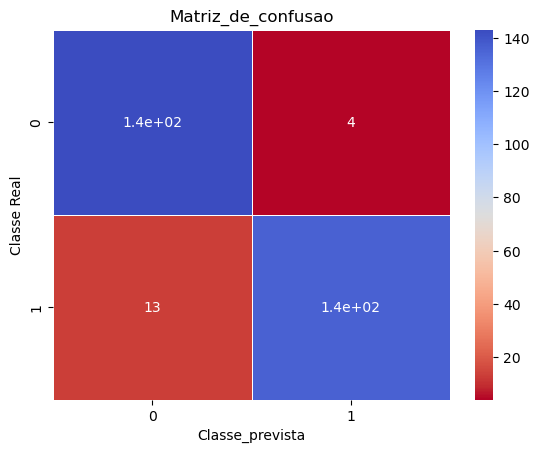


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.97      0.91      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [50]:
clf = LogisticRegression(C=best_C, penalty = 'l2', solver ='lbfgs')
predict(clf, X_train_undersampled,y_train_undersampled,X_test_undersampled,y_test_undersampled)

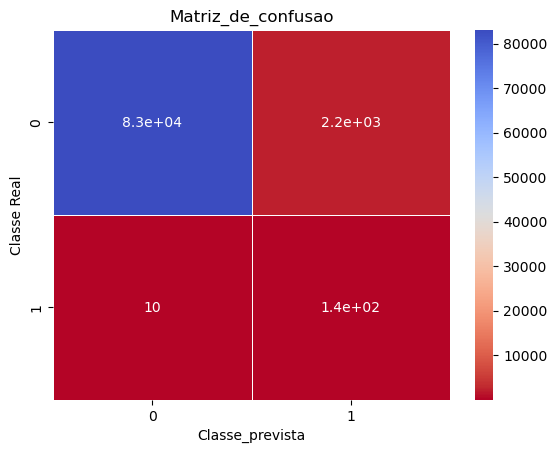


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.93      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [51]:
predict(clf,X_train_undersampled,y_train_undersampled,X_test,y_test)

In [52]:
clf = LogisticRegression(penalty = 'l2',solver ='lbfgs')
best_score_whole, best_C_whole = train(clf,X_train,y_train)

   Pontuacao       C
0   0.584432    0.01
1   0.604700    0.10
2   0.608022    1.00
3   0.608022   10.00
4   0.608022  100.00
A melhor pontuacao de recordacao eh:  0.6080222307849583
O melhor parametro C eh:  1


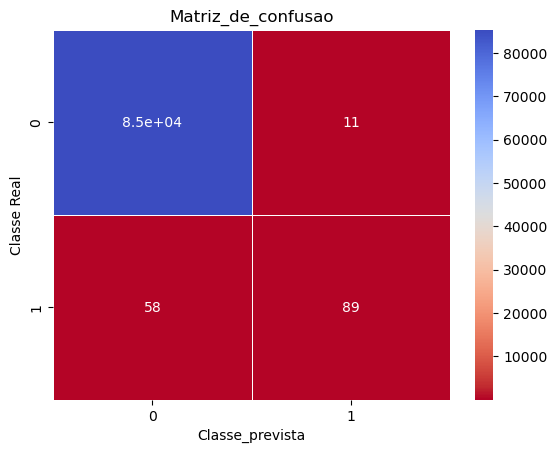


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.61      0.72       147

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [53]:
clf = LogisticRegression(C=best_C_whole,penalty = 'l2',solver='lbfgs')
predict(clf,X_train,y_train,X_test,y_test)

In [54]:
clf = SVC(gamma='auto')
best_score, best_C = train(clf, X_train_undersampled,y_train_undersampled)

   Pontuacao       C
0   0.600000    0.01
1   0.932737    0.10
2   0.917872    1.00
3   0.942040   10.00
4   0.935886  100.00
A melhor pontuacao de recordacao eh:  0.9420398187023254
O melhor parametro C eh:  10


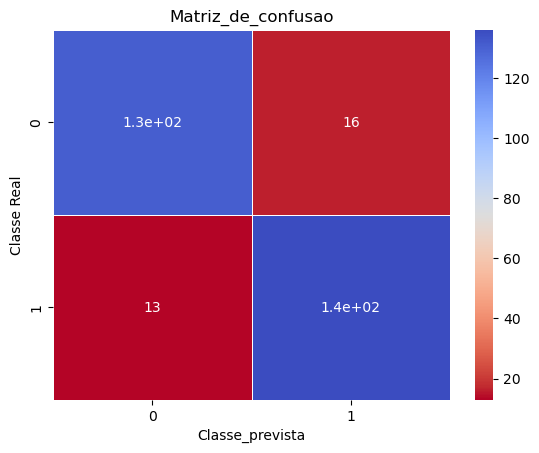


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       147
           1       0.89      0.91      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



In [55]:
clf = SVC(C=best_C,gamma='auto')
predict(clf, X_train_undersampled,y_train_undersampled,X_test_undersampled,y_test_undersampled)

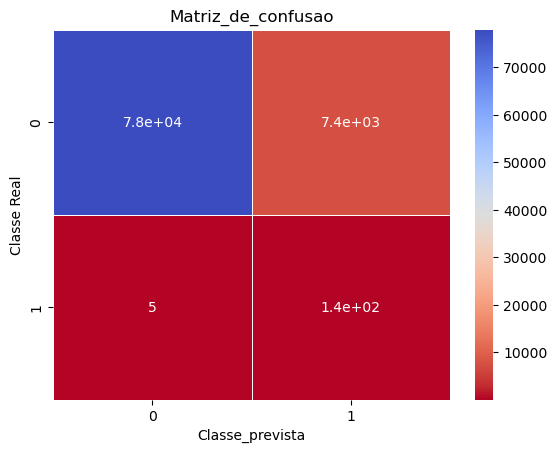


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.97      0.04       147

    accuracy                           0.91     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.91      0.95     85443



In [56]:
predict(clf,X_train_undersampled,y_train_undersampled,X_test,y_test)

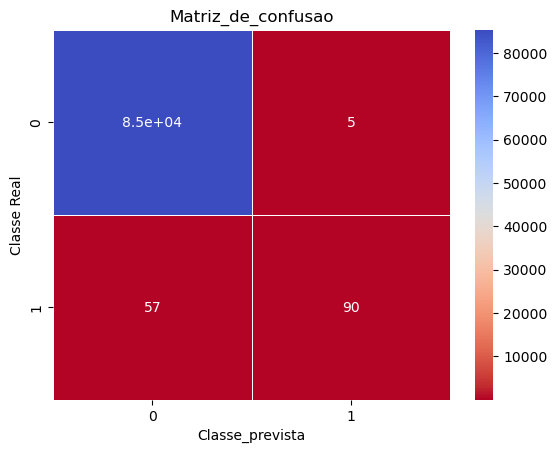


----------Relatorio de classificacao------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.61      0.74       147

    accuracy                           1.00     85443
   macro avg       0.97      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [57]:
predict(clf,X_train,y_train,X_test,y_test)